In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from core.data import load_from_kaggle


In [10]:
dataset_link = "umuttuygurr/e-commerce-fraud-detection-dataset" # replace with your dataset link from Kaggle 
destination = "../data/raw"
dataset_name = dataset_link.split("/")[-1]

files = load_from_kaggle(
    dataset_link=dataset_link, 
    destination=destination,
    )

100%|██████████| 5.96M/5.96M [00:01<00:00, 4.02MB/s]

Extracting files...


Loading dataset from C:\Users\Anna\.cache\kagglehub\datasets\umuttuygurr\e-commerce-fraud-detection-dataset\versions\1 to ../data/raw\e-commerce-fraud-detection-dataset
Moving file: C:\Users\Anna\.cache\kagglehub\datasets\umuttuygurr\e-commerce-fraud-detection-dataset\versions\1\transactions.csv to c:\Anna-Project\notebooks\../data/raw\e-commerce-fraud-detection-dataset
Files moved to '../data/raw\e-commerce-fraud-detection-dataset' directory.


In [11]:
files

['transactions.csv']

In [12]:
df = pd.read_csv("/".join(["../data/raw/", dataset_name, files[0]]))
df.head()

,transaction_id,user_id,account_age_days,total_transactions_user,avg_amount_user,amount,country,bin_country,channel,merchant_category,promo_used,avs_match,cvv_result,three_ds_flag,transaction_time,shipping_distance_km,is_fraud
0,1,1,141,47,147.93,84.75,FR,FR,web,travel,0,1,1,1,2024-01-06T04:09:39Z,370.95,0
1,2,1,141,47,147.93,107.90,FR,FR,web,travel,0,0,0,0,2024-01-09T20:13:47Z,149.62,0
2,3,1,141,47,147.93,92.36,FR,FR,app,travel,1,1,1,1,2024-01-12T06:20:11Z,164.08,0
3,4,1,141,47,147.93,112.47,FR,FR,web,fashion,0,1,1,1,2024-01-15T17:00:04Z,397.40,0
4,5,1,141,47,147.93,132.91,FR,US,web,electronics,0,1,1,1,2024-01-17T01:27:31Z,935.28,0


In [13]:
display(
    "Shape",
    df.shape,
    "Description",
    df.describe().round(2).T,
    "Duplicates",
    df.duplicated().sum(),
)


pd.DataFrame(
    {
        "Data Types": df.dtypes,
        "Missing Values": df.isnull().sum(),
        "Unique Values": df.nunique(),
        "Sample Values": [df[col].sample(3).tolist() for col in df.columns]
    })


'Shape'

(299695, 17)

'Description'

,count,mean,std,min,25%,50%,75%,max
transaction_id,299695.0,149848.00,86514.64,1.00,74924.50,149848.00,224771.50,299695.00
user_id,299695.0,3002.56,1732.31,1.00,1501.00,3007.00,4504.00,6000.00
account_age_days,299695.0,973.40,525.24,1.00,516.00,975.00,1425.00,1890.00
total_transactions_user,299695.0,50.67,5.98,40.00,46.00,51.00,56.00,60.00
avg_amount_user,299695.0,148.14,200.36,3.52,46.19,90.13,173.45,4565.29
amount,299695.0,177.17,306.93,1.00,42.10,89.99,191.11,16994.74
promo_used,299695.0,0.15,0.36,0.00,0.00,0.00,0.00,1.00
avs_match,299695.0,0.84,0.37,0.00,1.00,1.00,1.00,1.00
cvv_result,299695.0,0.87,0.33,0.00,1.00,1.00,1.00,1.00
three_ds_flag,299695.0,0.78,0.41,0.00,1.00,1.00,1.00,1.00


'Duplicates'

np.int64(0)

,Data Types,Missing Values,Unique Values,Sample Values
transaction_id,int64,0,299695,"[51304, 259171, 18969]"
user_id,int64,0,6000,"[809, 181, 5775]"
account_age_days,int64,0,1801,"[1690, 1234, 222]"
total_transactions_user,int64,0,21,"[54, 54, 58]"
avg_amount_user,float64,0,5347,"[175.1, 197.51, 69.6]"
amount,float64,0,60043,"[128.74, 109.63, 110.3]"
country,object,0,10,"[TR, NL, GB]"
bin_country,object,0,10,"[ES, FR, PL]"
channel,object,0,2,"[app, app, app]"
merchant_category,object,0,5,"[gaming, gaming, travel]"


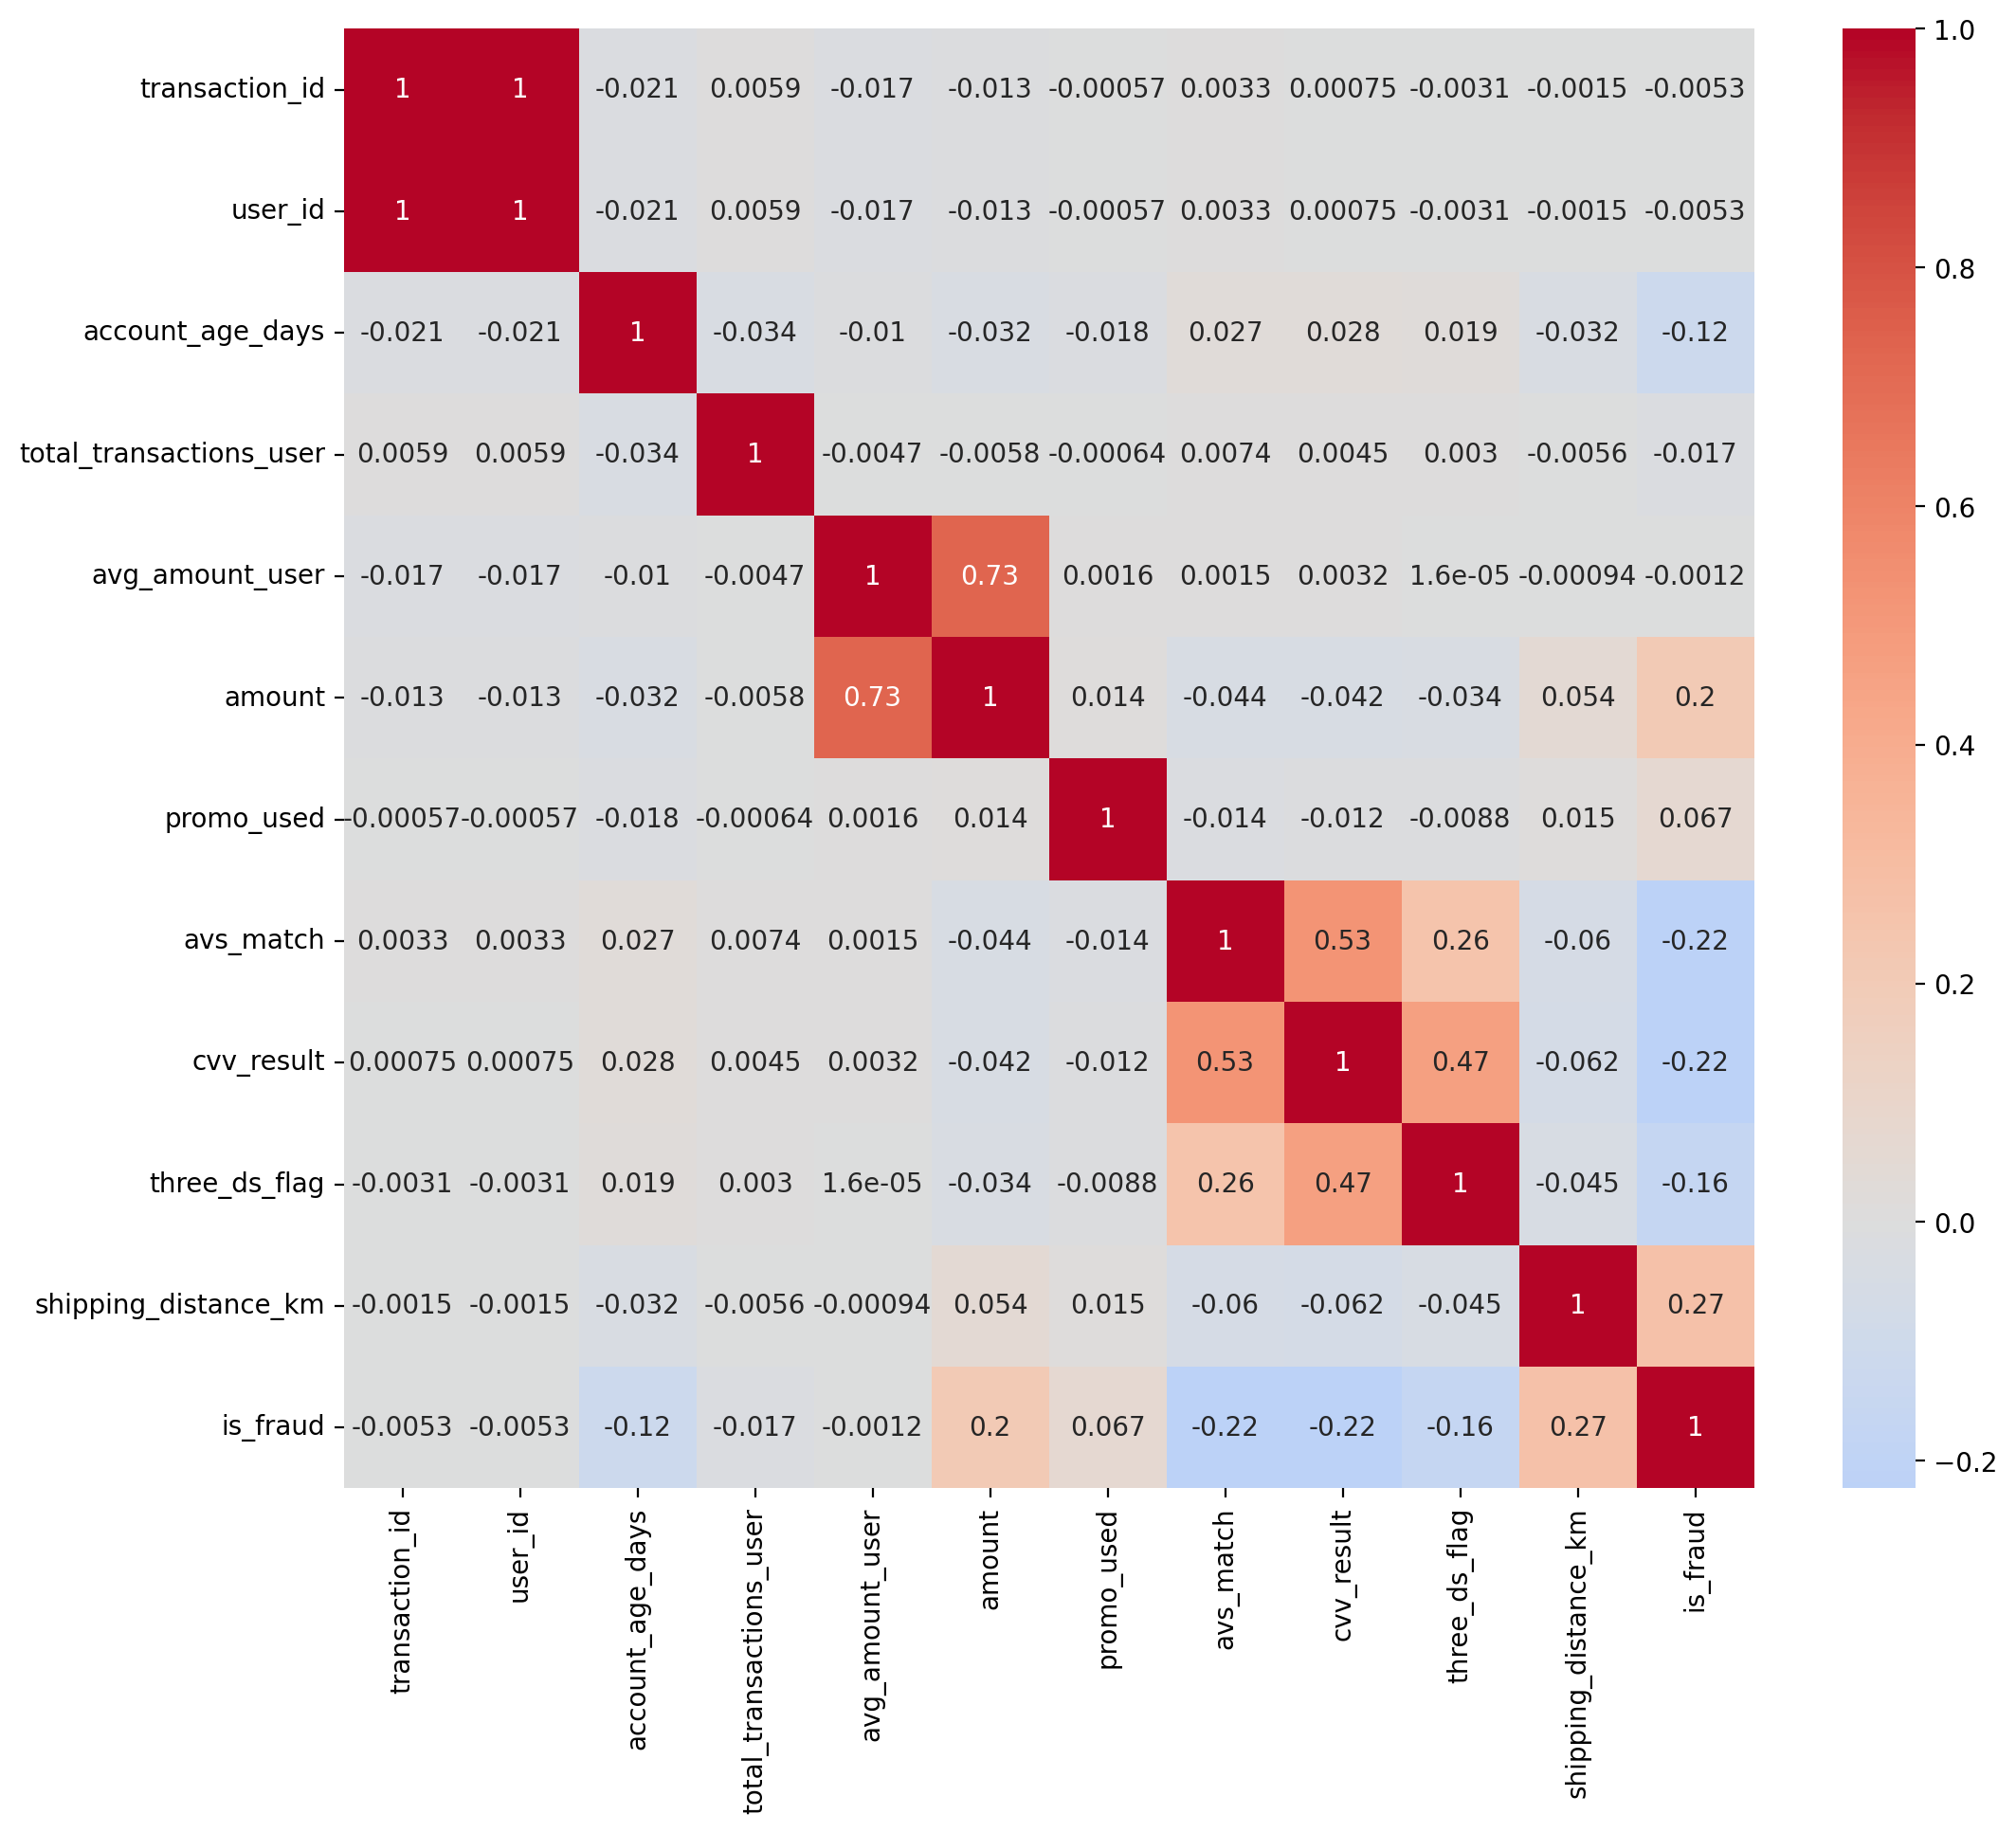

In [14]:
fig, ax = plt.subplots(figsize=(12, 10), dpi=200)

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0, ax=ax);